In [1]:
import numpy as np
from matplotlib import pyplot as plt
import padasip as pa
from scipy import fftpack
import processing_signals as ps

# plt.figure(figsize=(10, 7))

In [2]:
regexp = r'[+-]?\d+\.?\d*'
BP1 = np.fromregex('BP1.lcn', regexp, [('num', np.float64)])['num']
BP2 = np.fromregex('BP2.lcn', regexp, [('num', np.float64)])['num']
OPERATOR = np.fromregex('OPERATOR.lcn', regexp, [('num', np.float64)])['num']

print(BP1.size, BP2.size, OPERATOR.size)

501 501 1025


Моделируем входной и выходной 2d сигнал на адаптивный фильтр

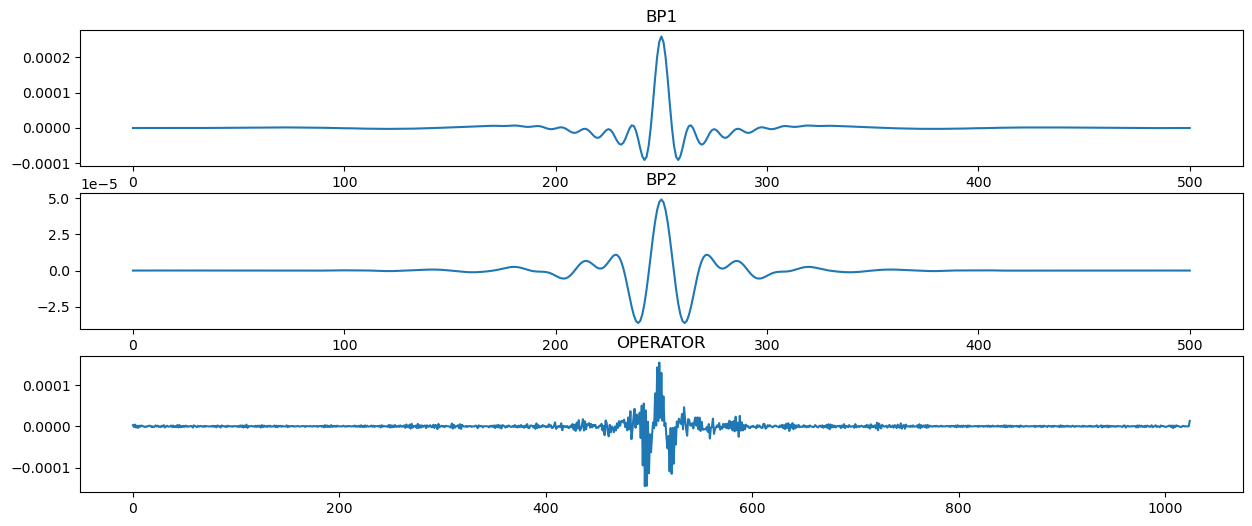

In [3]:
plt.figure(figsize=(15, 6))

plt.subplot(311)
plt.plot(BP1)
plt.title("BP1")

plt.subplot(312)
plt.plot(BP2)
plt.title("BP2")

plt.subplot(313)
plt.plot(OPERATOR)
plt.title("OPERATOR")
plt.show()

(501,) (1025,)


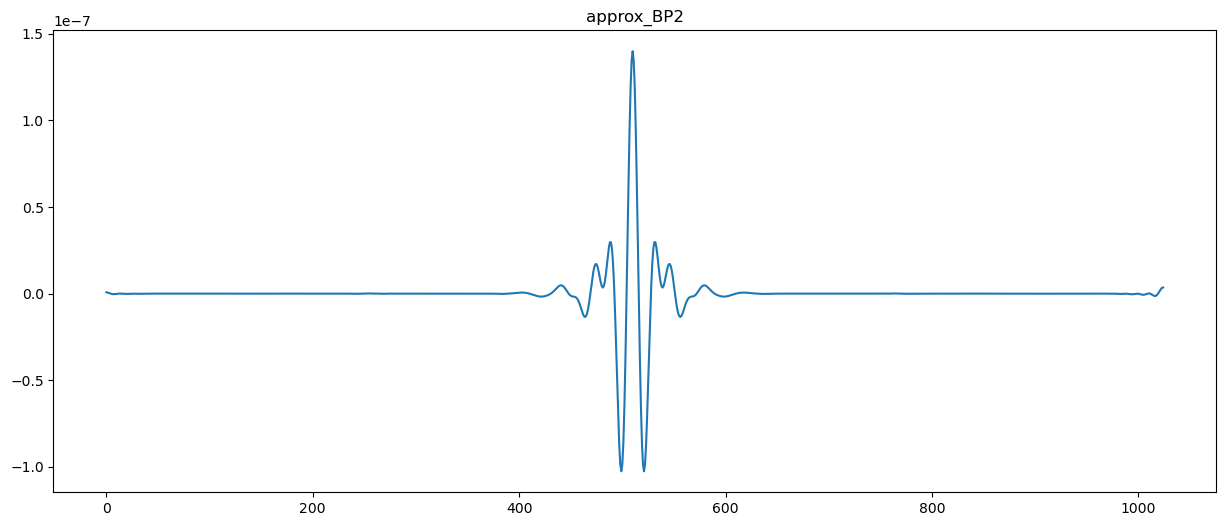

In [4]:
approx_BP2 = ps.processing_of_signal(BP1, OPERATOR)

plt.figure(figsize=(15, 6))

# plt.plot(BP2)
plt.plot(approx_BP2)
plt.title("approx_BP2")

plt.show()

In [77]:
approx_weights_nlms = ps.fitting_of_weights(BP1, BP2, 10, 0.8, 0.000).flatten()
print(approx_weights_nlms)

[-0.21524959  0.02227469  0.20348045  0.29191097  0.26577976  0.14693831
 -0.03914705 -0.19722588 -0.35906033 -0.21912955]


In [78]:
approx_weights_rls = ps.RLS(BP1, BP2, 10, 0.9).flatten()
print(approx_weights_rls)

[  8.80978615 -17.02802352 -14.85856239  44.40979204  -5.369444
 -19.41191499 -27.52410016  49.8558149  -17.15516363  -1.76608575]


(501,) (10,)
(501,) (10,)


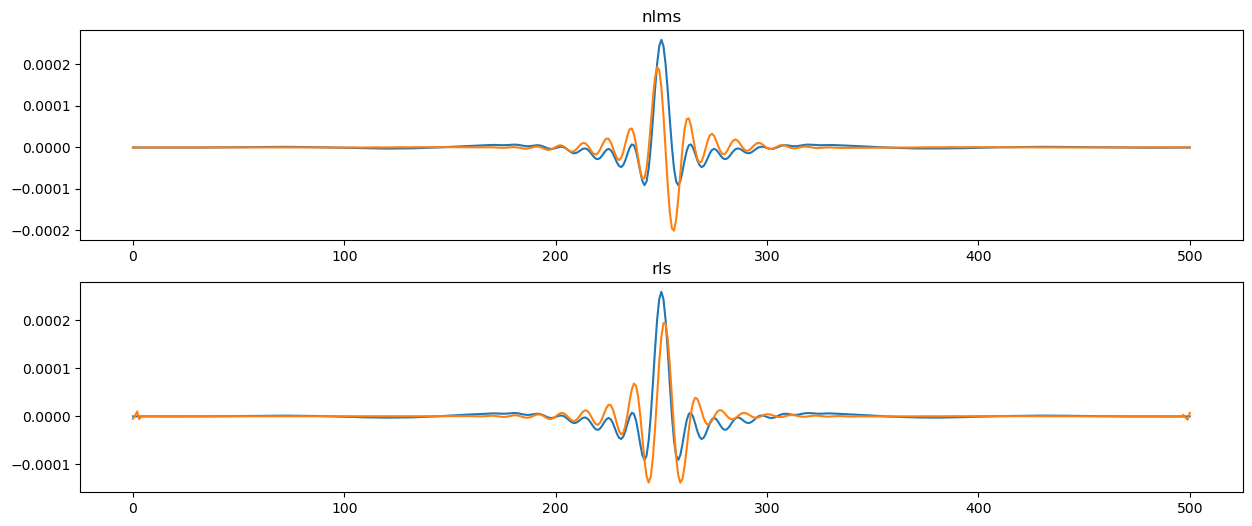

In [79]:
approx_BP2_nlms = ps.processing_of_signal(BP1, approx_weights_nlms)
approx_BP2_rls = ps.processing_of_signal(BP1, approx_weights_rls)

plt.figure(figsize=(15, 6))

plt.subplot(211)
plt.plot(BP1)
plt.plot(approx_BP2_nlms)
plt.title("nlms")

plt.subplot(212)
plt.plot(BP1)
plt.plot(approx_BP2_rls)
plt.title("rls")

plt.show()

# Padasip

In [69]:
number_of_weights_p_nlms = 10
number_of_weights_p_rls = 10

In [70]:
first_input_1d_nlms = pa.input_from_history(BP1, number_of_weights_p_nlms)
first_input_1d_rls = pa.input_from_history(BP1, number_of_weights_p_rls)
second_input_1d = BP2

In [71]:
f = pa.filters.FilterNLMS(n=number_of_weights_p_nlms, mu=2*0.5, eps=0, w="zeros")
y, e, w = f.run(second_input_1d[:-(number_of_weights_p_nlms-1)], first_input_1d_nlms)

approx_weights_p_nlms = w[-1]
print(approx_weights_p_nlms)

[ 0.06543479 -0.24915505 -0.33311097 -0.21720172  0.0108293   0.23994551
  0.37147518  0.346295    0.15691187 -0.15687367]


In [72]:
f = pa.filters.FilterRLS(n=number_of_weights_p_rls, mu=0.9, w="zeros")
y, e, w = f.run(second_input_1d[:-(number_of_weights_p_rls-1)], first_input_1d_rls)

approx_weights_p_rls = w[-1]
print(approx_weights_p_rls)

[-4.83005397  9.24580287  0.69292782 -5.47206668 -7.56628303  6.43677997
  7.15305812 -1.36099974 -9.54193285  5.22997596]


(501,) (10,)
(501,) (10,)


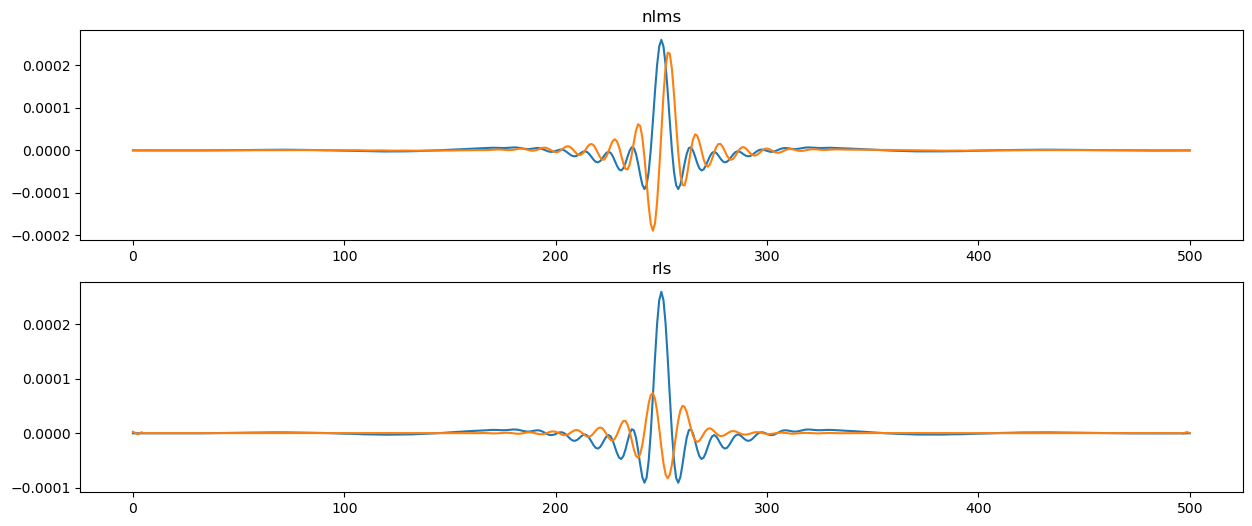

In [73]:
approx_BP2_p_nlms = ps.processing_of_signal(BP1, approx_weights_p_nlms)
approx_BP2_p_rls = ps.processing_of_signal(BP1, approx_weights_p_rls)

plt.figure(figsize=(15, 6))

plt.subplot(211)
plt.plot(BP1)
plt.plot(approx_BP2_p_nlms)
plt.title("nlms")

plt.subplot(212)
plt.plot(BP1)
plt.plot(approx_BP2_p_rls)
plt.title("rls")

plt.show()